In [ ]:
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir('/content/drive/MyDrive/spoiled-fruits-vs-fresh-fruits-classification-master/dataset')

In [ ]:
DATADIR = '/content/drive/MyDrive/spoiled-fruits-vs-fresh-fruits-classification-master/dataset/test'
CATAGORIES = ["freshbanana","rottenbanana"]

In [ ]:
def prepare(filepath):
    IMG_SIZE = 50
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array)
    plt.show()
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    plt.imshow(new_array)
    plt.show()

    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [ ]:
import tensorflow as tf

model = tf.keras.models.load_model('onefruit-cnn.model')

  0%|          | 0/381 [00:00<?, ?it/s]

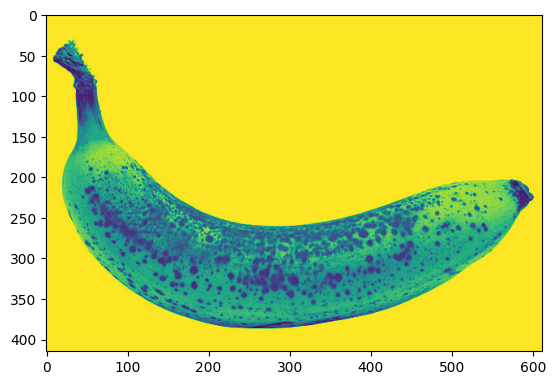

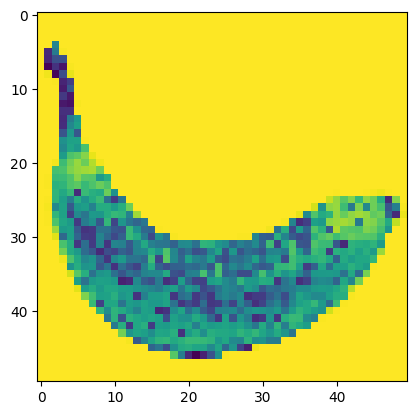

1/1 [==============================] - 0s 320ms/step


  0%|          | 0/381 [00:01<?, ?it/s]

[[1.]]
rotten


In [ ]:
from tqdm import tqdm
import os

# ... (Define the model and prepare() function)

count = 1
path = os.path.join(DATADIR, CATAGORIES[0])

for img in tqdm(os.listdir(path)):
    # Predict for each image in the directory
    img_path = os.path.join(path, img)
    prediction = model.predict([prepare ('/content/drive/MyDrive/spoiled-fruits-vs-fresh-fruits-classification-master/rotban.jpg')])
    print(prediction)

    if int(prediction[0][0]) == 1:
        print("rotten")
    else:
        print("fresh")

    break


In [ ]:
from tqdm import tqdm
import os


testing_data = []
IMG_SIZE = 50

CATEGORIES = ["freshbanana","rottenbanana"]
def create_testing_data():
    for category in CATEGORIES:

        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)


        for img in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                testing_data.append([new_array, class_num])
            except Exception as e:
                pass

create_testing_data()

print(len(testing_data))

100%|██████████| 530/530 [00:12<00:00, 41.34it/s] 

911


In [ ]:
import random

random.shuffle(testing_data)
X = []
y = []
import numpy as np
for features,label in testing_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
import pickle

pickle_out = open("ATXNS.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("atyns.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

[[[[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  ...

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]]]


In [ ]:
import pickle

def evaluate_model(model, X, y):
    try:
        pickle_in = open("/content/drive/MyDrive/spoiled-fruits-vs-fresh-fruits-classification-master/dataset/ATXNS (1).pickle","rb")
        X = pickle.load(pickle_in)

        pickle_in = open("/content/drive/MyDrive/spoiled-fruits-vs-fresh-fruits-classification-master/dataset/atyns (1).pickle","rb")
        y = pickle.load(pickle_in)

        X = X/255.0
        y = np.array(y)
        results = model.evaluate(X, y, batch_size=128)
        print('test loss, test acc:')
        print(results)
    except Exception as e:
        print(e)

if __name__ == '__main__':
    evaluate_model(model, X, y)


8/8 [==============================] - 1s 123ms/step - loss: 0.0337 - accuracy: 0.9879
test loss, test acc:
[0.03373512998223305, 0.9879253506660461]


In [ ]:
from tqdm import tqdm
import matplotlib.pyplot as plt
count = 1
pred = []

for category in CATEGORIES:
  path = os.path.join(DATADIR,category)
  print(path)
  for img in tqdm(os.listdir(path)):
    #prediction = model.predict([prepare(os.path.join(path,img))])
    #prediction = model.predict([prepare('samples/fapp.jpg')])
    #print(prediction)
    if int(prediction[0][0]) == 1:
      pred.append("Rotten Banana")
    else:
      pred.append("Fresh Banana")

/content/drive/MyDrive/spoiled-fruits-vs-fresh-fruits-classification-master/dataset/test/freshbanana


100%|██████████| 381/381 [00:00<00:00, 494899.30it/s]


/content/drive/MyDrive/spoiled-fruits-vs-fresh-fruits-classification-master/dataset/test/rottenbanana


100%|██████████| 530/530 [00:00<00:00, 530291.30it/s]


In [ ]:
print(pred[:10])

['Rotten Banana', 'Rotten Banana', 'Rotten Banana', 'Rotten Banana', 'Rotten Banana', 'Rotten Banana', 'Rotten Banana', 'Rotten Banana', 'Rotten Banana', 'Rotten Banana']


In [ ]:
import random

#random.shuffle(testing_data)
X = []
y = []
actual = []
import numpy as np
for features,label in testing_data:
    X.append(features)
    y.append(label)
print(y[900:])
for i in y:
  if i == 1:
      actual.append("Rotten Banana")
  else:
      actual.append("Fresh Banana")
print(actual[:10])

[1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0]
['Rotten Banana', 'Fresh Banana', 'Fresh Banana', 'Rotten Banana', 'Fresh Banana', 'Rotten Banana', 'Fresh Banana', 'Rotten Banana', 'Rotten Banana', 'Fresh Banana']


In [ ]:
import csv
import pandas as pd

fruits = {'Actual Fruit': actual,
        'Predicted Fruit': pred
        }

df = pd.DataFrame(fruits, columns= ['Actual Fruit', 'Predicted Fruit'])

In [ ]:
df.head()

,Actual Fruit,Predicted Fruit
0,Rotten Banana,Rotten Banana
1,Fresh Banana,Rotten Banana
2,Fresh Banana,Rotten Banana
3,Rotten Banana,Rotten Banana
4,Fresh Banana,Rotten Banana


In [ ]:
from sklearn.utils import shuffle
df = shuffle(df)


In [ ]:
df.head()

,Actual Fruit,Predicted Fruit
709,Rotten Banana,Rotten Banana
837,Fresh Banana,Rotten Banana
760,Rotten Banana,Rotten Banana
180,Rotten Banana,Rotten Banana
296,Rotten Banana,Rotten Banana


In [ ]:
df.to_csv("ClassifiedFruits.csv")

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
actual = np.array(actual)
pred = np.array(pred)

In [ ]:
confusion = confusion_matrix(actual, pred, labels=["Fresh Banana", "Rotten Banana"])

In [ ]:
print("Confusion Matrix:")
print(confusion)

print("Classification Report:")
print(classification_report(actual, pred))

Confusion Matrix:
[[  0 381]
 [  0 530]]
Classification Report:
               precision    recall  f1-score   support

 Fresh Banana       0.00      0.00      0.00       381
Rotten Banana       0.58      1.00      0.74       530

     accuracy                           0.58       911
    macro avg       0.29      0.50      0.37       911
 weighted avg       0.34      0.58      0.43       911



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


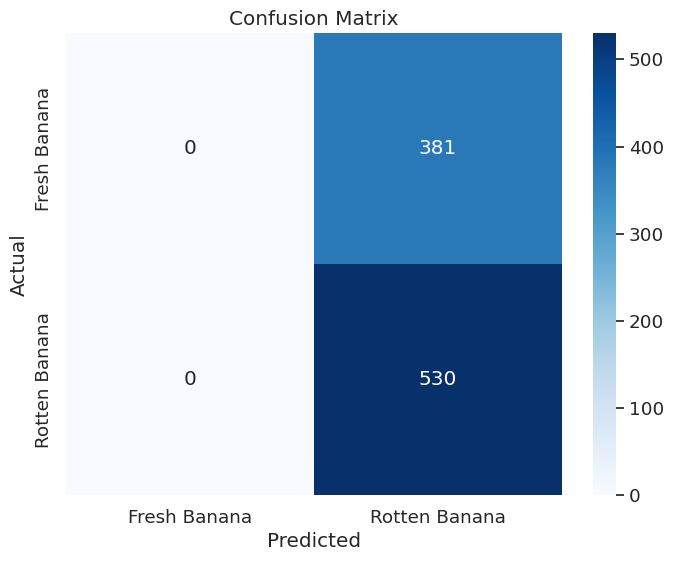

In [ ]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", xticklabels=["Fresh Banana", "Rotten Banana"], yticklabels=["Fresh Banana", "Rotten Banana"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

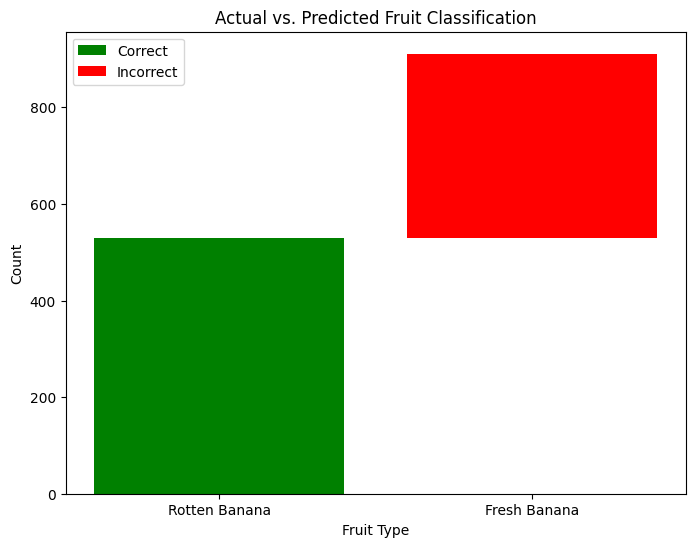

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

fruits = {'Actual Fruit': actual,
          'Predicted Fruit': pred}

df = pd.DataFrame(fruits, columns=['Actual Fruit', 'Predicted Fruit'])
df = shuffle(df)


df.to_csv("ClassifiedFruits.csv", index=False)


correct_predictions = df[df['Actual Fruit'] == df['Predicted Fruit']]
incorrect_predictions = df[df['Actual Fruit'] != df['Predicted Fruit']]


correct_counts = correct_predictions['Actual Fruit'].value_counts()
incorrect_counts = incorrect_predictions['Actual Fruit'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(correct_counts.index, correct_counts, label='Correct', color='green')
plt.bar(incorrect_counts.index, incorrect_counts, bottom=correct_counts, label='Incorrect', color='red')
plt.xlabel('Fruit Type')
plt.ylabel('Count')
plt.title('Actual vs. Predicted Fruit Classification')
plt.legend()
plt.show()
